In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Import Combined Cleaned Kaggle Data
df = pd.read_csv('Cleaned_Combined_Kaggle_Data.csv')
df.head()

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
0,23.0,Male,France,Master’s degree,Software Engineer,2.0,34999.5
1,42.0,Male,India,Professional degree,Software Engineer,0.0,6249.5
2,42.0,Male,Australia,Master’s degree,Other,2.0,274999.5
3,52.0,Male,France,Master’s degree,Data Scientist,20.0,64999.5
4,23.0,Male,India,Master’s degree,Data Scientist,5.0,12499.5


In [3]:
male = []
for x in df['Gender']:
    male.append(x.replace('Man','Male'))
df['Gender'] = male

In [4]:
female = []
for x in df['Gender']:
    female.append(x.replace('Woman','Female'))
df['Gender'] = female

In [5]:
Women_df = df[df['Gender'] == 'Female']

In [6]:
Men_df = df[df['Gender'] == 'Male']

In [7]:
count_women = len(Women_df)

In [8]:
count_men = len(Men_df)

In [9]:
women_percentage = 100*(count_women/(count_women + count_men))
women_percentage

13.63160141244034

In [10]:
men_percentage = 100 * (count_men/(count_men + count_women))
men_percentage

86.36839858755965

In [11]:
Women_df.shape
Women_df.describe()

,Age,Years_Coding,Salary
count,3513.000000,3513.000000,3513.000000
mean,33.521492,6.803587,50899.018503
std,9.168174,6.370098,55966.193587
min,19.500000,0.000000,1499.500000
25%,27.000000,2.000000,8749.500000
50%,32.000000,5.000000,34999.500000
75%,37.000000,10.000000,74999.500000
max,64.500000,20.000000,400000.000000


In [12]:
Men_df.shape
Men_df.describe()

,Age,Years_Coding,Salary
count,22258.000000,22258.000000,22258.000000
mean,35.378291,7.899137,58280.121664
std,10.326779,6.819394,61340.124287
min,19.500000,0.000000,1499.500000
25%,27.000000,2.000000,12499.500000
50%,32.000000,5.000000,44999.500000
75%,42.000000,10.000000,84999.500000
max,64.500000,20.000000,400000.000000


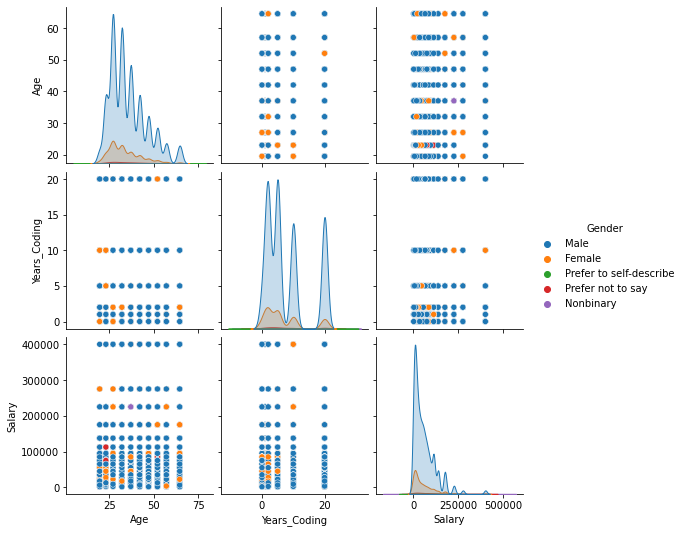

In [13]:
sns.pairplot(df,hue='Gender')

From the graphs above, obviously more males than females. With more years of coding and age, comes a higher salary.

In [14]:
Women_df.corr()

,Age,Years_Coding,Salary
Age,1.000000,0.391392,0.274994
Years_Coding,0.391392,1.000000,0.360625
Salary,0.274994,0.360625,1.000000


For women, Years cooding has a higher correlation in relation to salary vs Age

In [15]:
Men_df.corr()

,Age,Years_Coding,Salary
Age,1.000000,0.436971,0.321635
Years_Coding,0.436971,1.000000,0.358184
Salary,0.321635,0.358184,1.000000


For men, Years coding also has a higher correlation in relation to salary vs age

<AxesSubplot:xlabel='Years_Coding', ylabel='Age'>

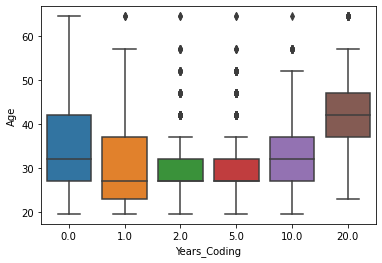

In [16]:
sns.boxplot(y='Age',x='Years_Coding',data=Women_df)

<AxesSubplot:xlabel='Years_Coding', ylabel='Age'>

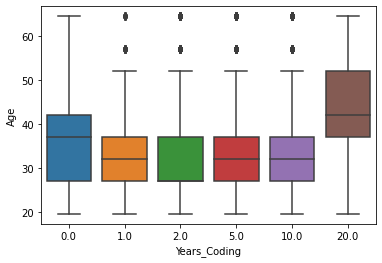

In [17]:
sns.boxplot(y='Age',x='Years_Coding',data=Men_df)

<AxesSubplot:xlabel='Years_Coding', ylabel='Salary'>

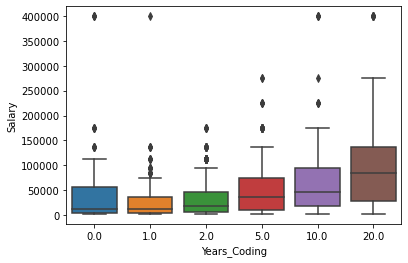

In [18]:
sns.boxplot(y='Salary',x='Years_Coding',data=Women_df)

In [2]:
sns.boxplot(y='Salary',x='Years_Coding',data=Men_df)

NameError: name 'sns' is not defined

In [20]:
Women_X = Women_df[['Age', 'Years_Coding', 'Gender', 'Country','Formal_Education','Position']]

In [21]:
Men_X = Men_df[['Age', 'Years_Coding', 'Gender', 'Country','Formal_Education','Position']]

In [22]:
# Create dummy variables for categorical data (Gender, Country, Position, Education)
Women_X = pd.get_dummies(data=Women_X, drop_first=True)
Women_X.head()

,Age,Years_Coding,Country_Argentina,Country_Australia,Country_Austria,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Brazil,Country_Canada,...,Position_DBA/Database Engineer,Position_Data Analyst,Position_Data Engineer,Position_Data Scientist,Position_Machine Learning Engineer,Position_Other,Position_Product/Project Manager,Position_Research Scientist,Position_Software Engineer,Position_Statistician
5,23.0,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,52.0,20.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,23.0,2.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19,32.0,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,32.0,20.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
# Create dummy variables for categorical data (Gender, Country, Position, Education)
Men_X = pd.get_dummies(data=Men_X, drop_first=True)
Men_X.head()

,Age,Years_Coding,Country_Argentina,Country_Australia,Country_Austria,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Brazil,Country_Canada,...,Position_DBA/Database Engineer,Position_Data Analyst,Position_Data Engineer,Position_Data Scientist,Position_Machine Learning Engineer,Position_Other,Position_Product/Project Manager,Position_Research Scientist,Position_Software Engineer,Position_Statistician
0,23.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,42.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,42.0,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,52.0,20.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,23.0,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
Women_Y = Women_df['Salary']
Men_Y = Men_df['Salary']

In [25]:
from sklearn.model_selection import train_test_split
Women_X_train, Women_X_test, Women_y_train, Women_y_test = train_test_split(Women_X, Women_Y, test_size=0.25, random_state=101)
print(Women_X_train.shape)
print(Women_X_test.shape)
print(Women_y_train.shape)
print(Women_y_test.shape)

(2634, 78)
(879, 78)
(2634,)
(879,)


In [26]:
from sklearn.model_selection import train_test_split
Men_X_train, Men_X_test, Men_y_train, Men_y_test = train_test_split(Men_X, Men_Y, test_size=0.25, random_state=101)
print(Men_X_train.shape)
print(Men_X_test.shape)
print(Men_y_train.shape)
print(Men_y_test.shape)

(16693, 80)
(5565, 80)
(16693,)
(5565,)


In [27]:
from sklearn.linear_model import LinearRegression
Women_model = LinearRegression()
Women_model.fit(Women_X_train,Women_y_train)

LinearRegression()

In [28]:
from sklearn.linear_model import LinearRegression
Men_model = LinearRegression()
Men_model.fit(Men_X_train,Men_y_train)

LinearRegression()

In [29]:
# print the intercept
print(Women_model.intercept_)

-12809.189593519208


In [30]:
# print the intercept
print(Men_model.intercept_)

-28690.829670698346


In [31]:
Women_coeff_parameter = pd.DataFrame(Women_model.coef_,Women_X.columns,columns=['Coefficient'])
Women_coeff_parameter

,Coefficient
Age,517.076115
Years_Coding,1694.142689
Country_Argentina,-6127.318856
Country_Australia,56865.964920
Country_Austria,44280.599326
...,...
Position_Other,-6983.319019
Position_Product/Project Manager,3985.967790
Position_Research Scientist,-10098.305561
Position_Software Engineer,-1252.027969


In [32]:
Men_coeff_parameter = pd.DataFrame(Men_model.coef_,Men_X.columns,columns=['Coefficient'])
Men_coeff_parameter

,Coefficient
Age,803.231460
Years_Coding,1439.454207
Country_Argentina,-1665.711438
Country_Australia,81607.245825
Country_Austria,48599.410503
...,...
Position_Other,7839.725774
Position_Product/Project Manager,13214.812442
Position_Research Scientist,-4436.891486
Position_Software Engineer,4211.039993


In [33]:
Women_predictions = Women_model.predict(Women_X_test)
Women_predictions

array([ 1.93953009e+04,  5.62853981e+04,  1.09034763e+05,  9.12052687e+04,
        9.50387769e+04,  5.68453766e+03,  3.44171253e+04,  1.63595588e+04,
        1.61769557e+04,  1.42263301e+05,  1.56831953e+03,  2.47274776e+04,
        8.44096289e+04,  9.01032481e+03,  3.53790431e+04,  1.93004349e+04,
        7.35251326e+03,  1.47416159e+04,  3.35065860e+04,  1.40288988e+04,
        1.25507142e+04,  6.72887279e+04,  1.06509638e+05,  1.07178159e+04,
        1.23982603e+05,  5.47567228e+04,  1.35556124e+05,  1.03109629e+05,
        9.30150351e+04,  2.50747279e+02,  9.38172597e+03,  1.12133220e+04,
        1.11566524e+04,  1.69973740e+04,  3.92373375e+03,  4.39166063e+04,
        1.38141505e+05,  2.74972890e+04,  1.09095019e+05,  3.24981603e+04,
        1.00821450e+05,  4.88736371e+04,  3.25399531e+04,  5.23453130e+04,
        5.14752335e+03,  5.58300019e+04,  3.14179389e+04,  8.79641746e+04,
        1.02954529e+05,  1.37092540e+05,  5.35085952e+04,  6.04249166e+04,
        1.04455795e+05,  

In [34]:
Men_predictions = Men_model.predict(Men_X_test)
Men_predictions

array([ 51721.24874632,  28403.29255867, 128911.84306251, ...,
        41143.63364548,  46821.13295868,  51394.90947173])

<AxesSubplot:xlabel='Salary'>

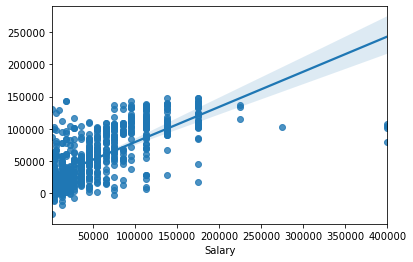

In [35]:
sns.regplot(Women_y_test,Women_predictions)

<AxesSubplot:xlabel='Salary'>

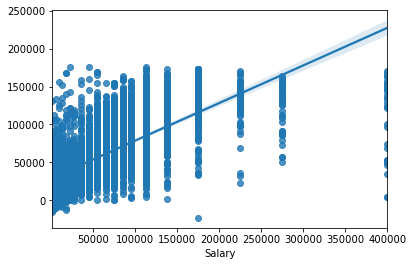

In [36]:
sns.regplot(Men_y_test,Men_predictions)

In [37]:
import statsmodels.api as sm
Woemn_X_train_Sm= sm.add_constant(Women_X_train)
Women_X_train_Sm= sm.add_constant(Women_X_train)
ls=sm.OLS(Women_y_train,Women_X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     37.01
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:51:02   Log-Likelihood:                -31550.
No. Observations:                2634   AIC:                         6.326e+04
Df Residuals:                    2555   BIC:                         6.372e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

From r-squared value, we have 52% chance of correctly predicting Women's salary based on age, years coding, education, and country

In [38]:
import statsmodels.api as sm
Men_X_train_Sm= sm.add_constant(Men_X_train)
Men_X_train_Sm= sm.add_constant(Men_X_train)
ls=sm.OLS(Men_y_train,Men_X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     208.2
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:51:03   Log-Likelihood:            -2.0200e+05
No. Observations:               16693   AIC:                         4.042e+05
Df Residuals:                   16612   BIC:                         4.048e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

From r-squared value, we have 50% chance of correctly predicting Women's salary based on age, years coding, education, and country